# 情感分析数据可视化

对 `sentiment_results.json` 中的 3009 条帖子数据进行可视化分析

In [15]:
import warnings
import json
import pandas as pd
from datetime import datetime
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager

# 忽略警告
warnings.filterwarnings('ignore')

# 强制设置中文字体 - 尝试多个可能的中文字体
font_names = ['Microsoft YaHei', 'SimHei', 'FangSong', 'KaiTi', 'STSong']
available_fonts = [f.name for f in font_manager.fontManager.ttflist]

# 找到第一个可用的中文字体
chinese_font = None
for font in font_names:
    if font in available_fonts:
        chinese_font = font
        break

# 设置字体
if chinese_font:
    plt.rcParams['font.sans-serif'] = [chinese_font]
    print(f"使用字体: {chinese_font}")
else:
    # 如果找不到，使用系统默认
    plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
    print("未找到中文字体，使用默认字体")

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10

使用字体: Microsoft YaHei


In [16]:
# 加载数据
data_path = Path("../data/sentiment_results.json")

with open(data_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)

# 加载圈子名称映射
circles_path = Path("../data/zhihu_ai_circles.json")
with open(circles_path, 'r', encoding='utf-8') as f:
    circles_data = json.load(f)

# 创建 ring_id 到 name 的映射
ring_to_name = {circle['ring_id']: circle['name'] for circle in circles_data}
df['ring_name'] = df['ring_id'].map(ring_to_name).fillna(df['ring_id'])

print(f"数据总量: {len(df)} 条")
print(f"\n列名: {df.columns.tolist()}")
df.head()

数据总量: 3009 条

列名: ['source', 'ring_id', 'content', 'likes', 'pub_time', 'sentiment', 'sentiment_score', 'ring_name']


,source,ring_id,content,likes,pub_time,sentiment,sentiment_score,ring_name
0,zhihu_circle,1961147042131870010,AI导致大规模失业的说法是不是一个悖论？\n人类大量失业并不会导致AI需求减少，因为AI的生...,0,2026-02-17T01:00:00,正面,1.0,AI与人类未来
1,zhihu_circle,1961147042131870010,张小北 x 关雅荻：深度探讨AI影像对电影行业的冲击\n最新这期《AI 影像放映室》是AI对...,11,2026-02-14T19:00:00,负面,0.0,AI与人类未来
2,zhihu_circle,1961147042131870010,AI时代最该担心的不是失业\n最近大火的seedance 2.0，真的超出想象。\n它直接碾...,0,2026-02-14T08:13:00,负面,0.0,AI与人类未来
3,zhihu_circle,1961147042131870010,Kimi把OpenClaw搬进浏览器了\n月之暗面昨天正式发布了 Kimi Claw Bet...,4,2026-02-16T21:11:00,正面,1.0,AI与人类未来
4,zhihu_circle,1961147042131870010,OpenClaw之父加入OpenAI始末\n2月15日，Sam Altman宣布：OpenC...,1,2026-02-16T16:22:00,负面,0.0,AI与人类未来


## 1. 数据基本信息

In [17]:
# 数据类型和缺失值
print("数据信息:")
print(df.info())

print("\n缺失值统计:")
print(df.isnull().sum())

数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source           3009 non-null   object 
 1   ring_id          3009 non-null   object 
 2   content          3009 non-null   object 
 3   likes            3009 non-null   int64  
 4   pub_time         3009 non-null   object 
 5   sentiment        3009 non-null   object 
 6   sentiment_score  3009 non-null   float64
 7   ring_name        3009 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 188.2+ KB
None

缺失值统计:
source             0
ring_id            0
content            0
likes              0
pub_time           0
sentiment          0
sentiment_score    0
ring_name          0
dtype: int64


## 2. 圈子 (ring_id) 分布

共有 15 个圈子
帖子数:
ring_name
AI与人类未来          466
AI 创投生态圈         263
科研 AI Hub        255
算法研究所            253
AI写作研究所          246
AI Coding 探索舰    241
AI 工具测评中心        237
AI 时代的我们         226
AI 安全研究所         214
DeepSeek 深潜舱     168
AI infra         140
AI 顶会联盟          116
NLP Hub           88
OpenMCP 博物馆       62
AI Talent Hub     34
Name: count, dtype: int64


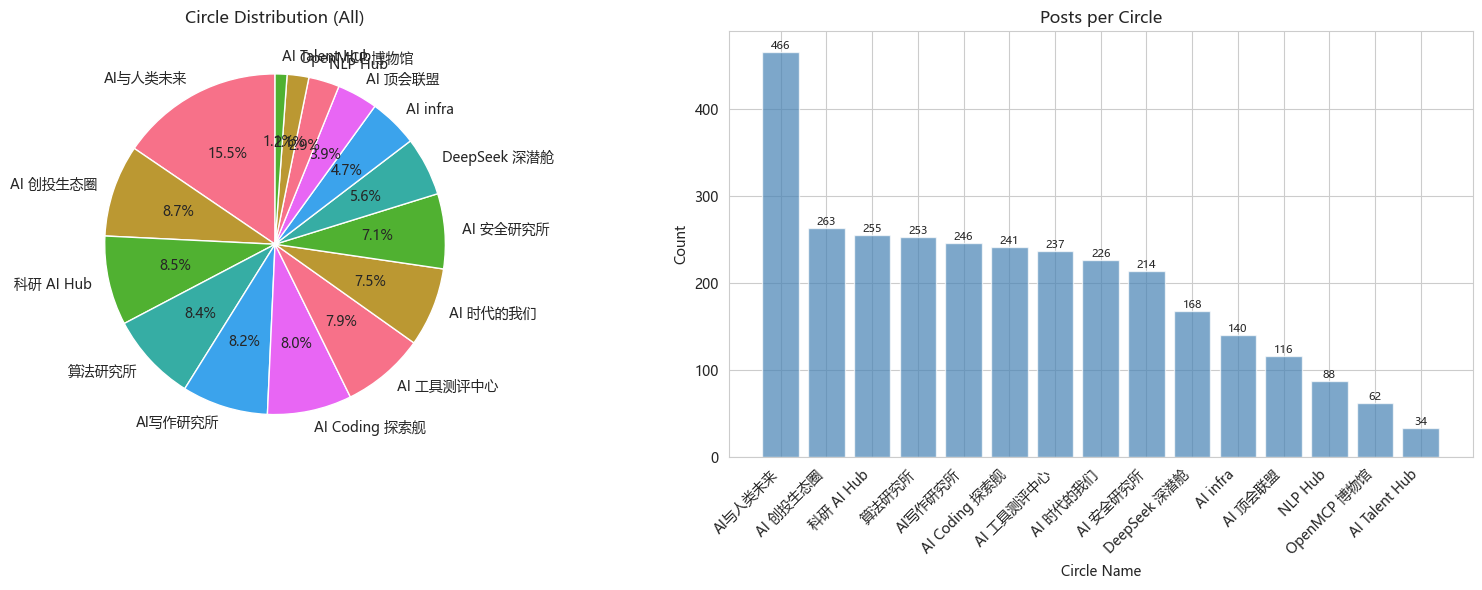

In [19]:
# 如果 ring_name 列不存在，先创建
if 'ring_name' not in df.columns:
    circles_path = Path("../data/zhihu_ai_circles.json")
    with open(circles_path, 'r', encoding='utf-8') as f:
        circles_data = json.load(f)
    ring_to_name = {circle['ring_id']: circle['name'] for circle in circles_data}
    df['ring_name'] = df['ring_id'].map(ring_to_name).fillna(df['ring_id'])

# 圈子分布
ring_counts = df['ring_name'].value_counts()
print(f"共有 {len(ring_counts)} 个圈子")
print(f"帖子数:")
print(ring_counts)

# 饼图 - 显示所有圈子
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].pie(ring_counts.values, labels=ring_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Circle Distribution (All)')

# 柱状图 - 按帖子数排序
bars = axes[1].bar(range(len(ring_counts)), ring_counts.values, color='steelblue', alpha=0.7)
axes[1].set_title('Posts per Circle')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Circle Name')
axes[1].set_xticks(range(len(ring_counts)))
axes[1].set_xticklabels(ring_counts.index, rotation=45, ha='right')

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## 3. 情感标签分布

情感标签分布:
sentiment
负面    1819
正面    1190
Name: count, dtype: int64


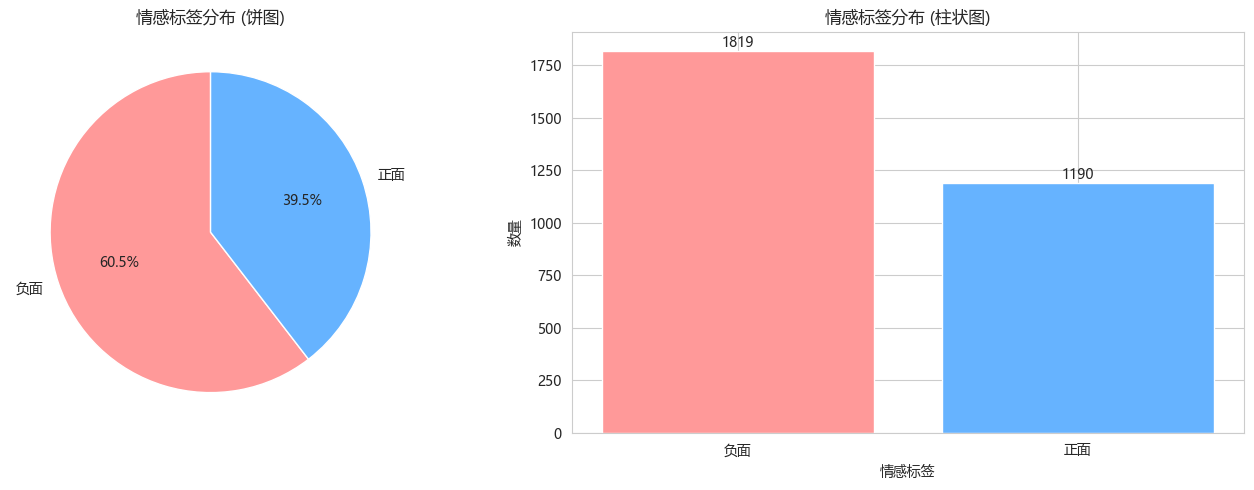

In [20]:
# 情感标签分布
sentiment_counts = df['sentiment'].value_counts()
print("情感标签分布:")
print(sentiment_counts)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 饼图
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
axes[0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
           startangle=90, colors=colors[:len(sentiment_counts)])
axes[0].set_title('情感标签分布 (饼图)')

# 柱状图
bars = axes[1].bar(sentiment_counts.index, sentiment_counts.values, color=colors[:len(sentiment_counts)])
axes[1].set_title('情感标签分布 (柱状图)')
axes[1].set_ylabel('数量')
axes[1].set_xlabel('情感标签')
# 添加数值标签
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 5. 时间分布分析

In [22]:
# 解析时间
df['datetime'] = pd.to_datetime(df['pub_time'])
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.to_period('M')

print(f"时间范围: {df['datetime'].min()} 到 {df['datetime'].max()}")

时间范围: 2025-03-21 18:43:00 到 2026-02-17 13:07:00


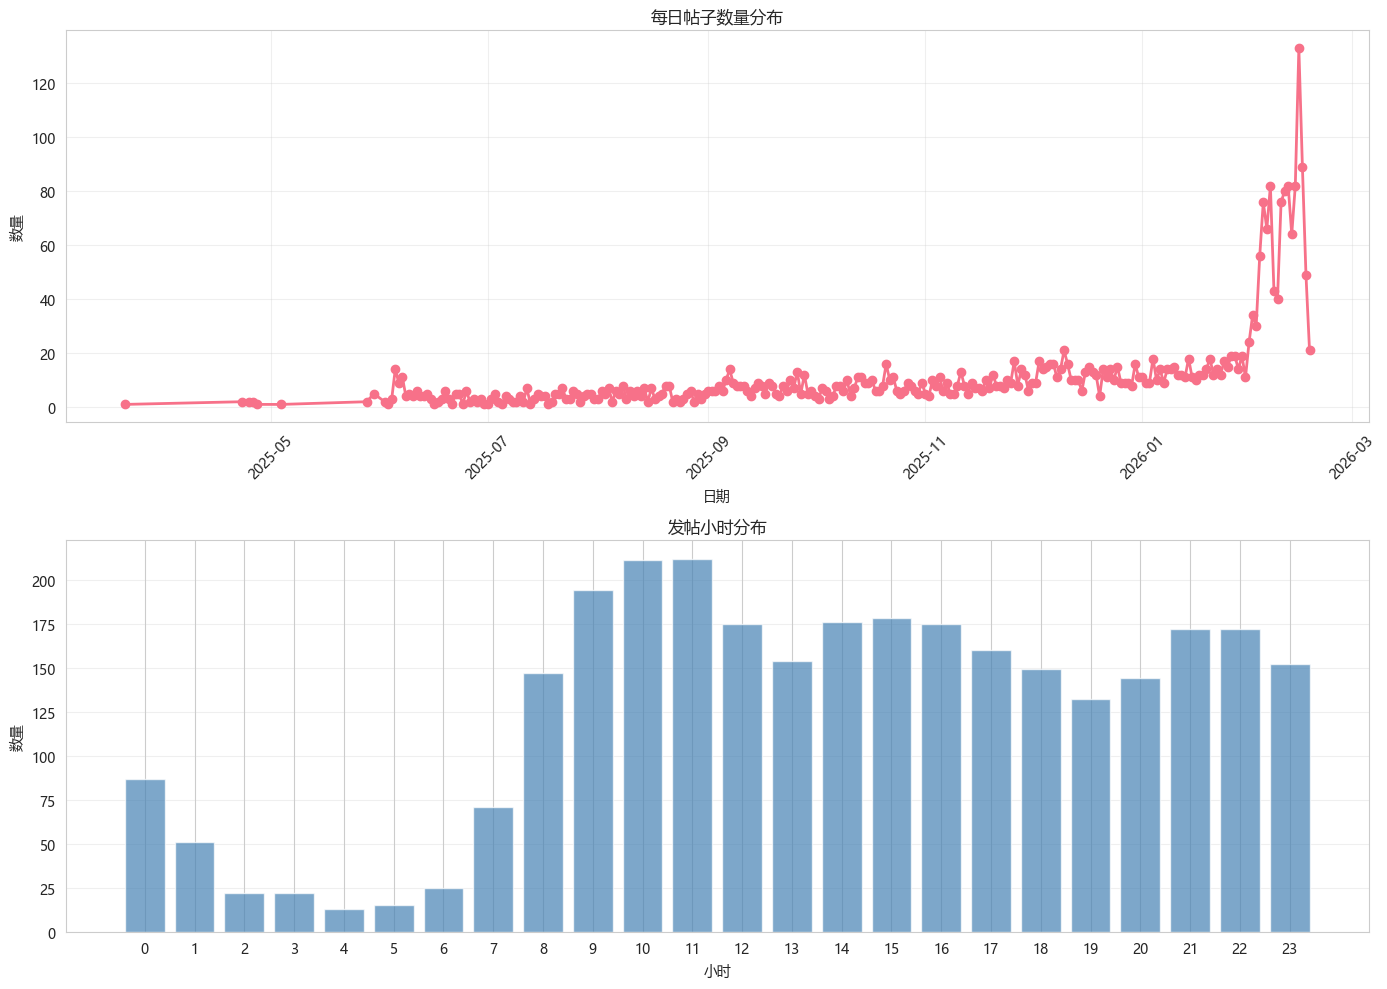

In [23]:
# 按日期分布
daily_counts = df.groupby('date').size()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# 时间序列折线图
axes[0].plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-', linewidth=2)
axes[0].set_title('每日帖子数量分布')
axes[0].set_xlabel('日期')
axes[0].set_ylabel('数量')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# 按小时分布
hourly_counts = df.groupby('hour').size()
axes[1].bar(hourly_counts.index, hourly_counts.values, color='steelblue', alpha=0.7)
axes[1].set_title('发帖小时分布')
axes[1].set_xlabel('小时')
axes[1].set_ylabel('数量')
axes[1].set_xticks(range(24))
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

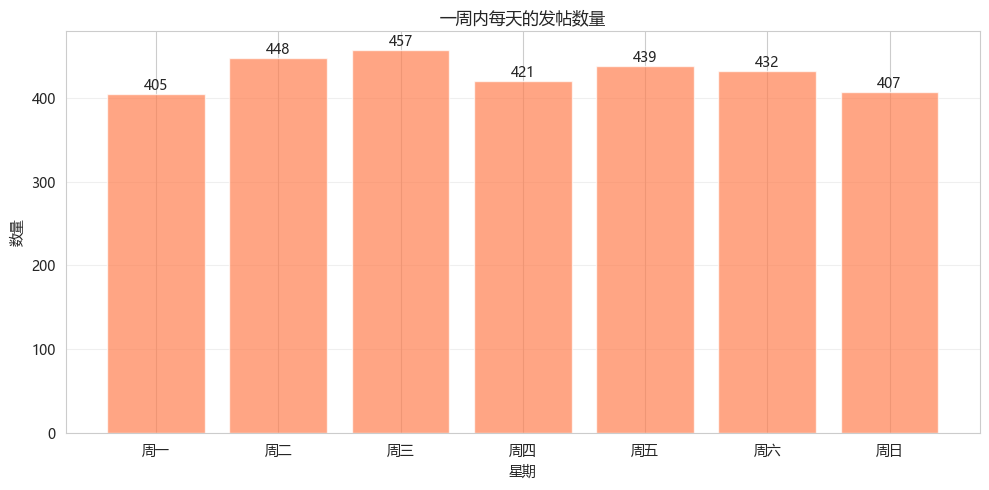

In [24]:
# 按星期几分布
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df.groupby('weekday').size().reindex(weekday_order, fill_value=0)

weekday_labels = ['周一', '周二', '周三', '周四', '周五', '周六', '周日']

plt.figure(figsize=(10, 5))
bars = plt.bar(weekday_labels, weekday_counts.values, color='coral', alpha=0.7)
plt.title('一周内每天的发帖数量')
plt.xlabel('星期')
plt.ylabel('数量')
plt.grid(True, alpha=0.3, axis='y')

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 6. 情感与时间的交叉分析

<Figure size 1400x600 with 0 Axes>

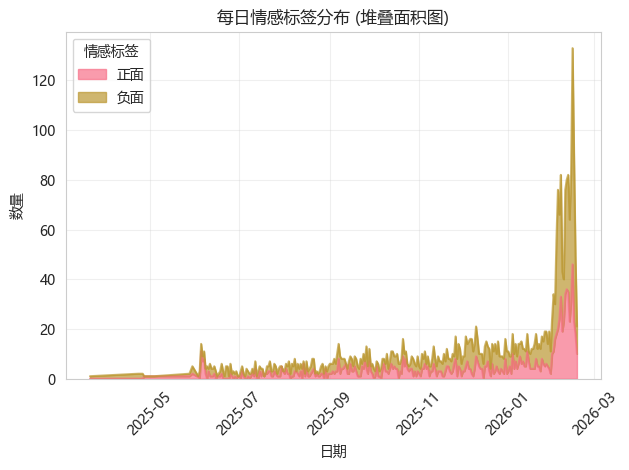

In [25]:
# 每日情感分布
daily_sentiment = df.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 6))
daily_sentiment.plot(kind='area', stacked=True, alpha=0.7)
plt.title('每日情感标签分布 (堆叠面积图)')
plt.xlabel('日期')
plt.ylabel('数量')
plt.legend(title='情感标签')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

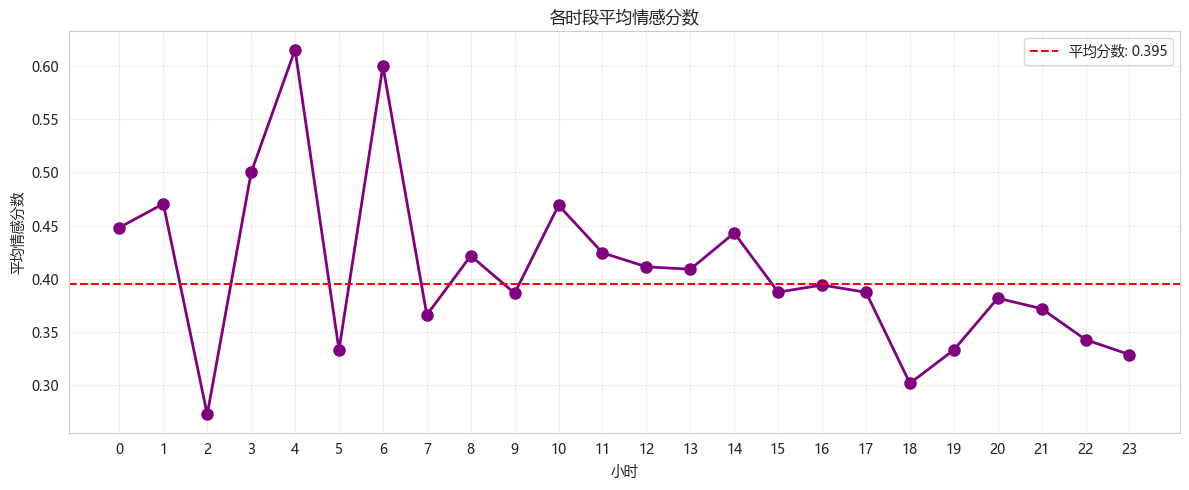

In [26]:
# 每小时平均情感分数
hourly_sentiment = df.groupby('hour')['sentiment_score'].mean()

plt.figure(figsize=(12, 5))
plt.plot(hourly_sentiment.index, hourly_sentiment.values, marker='o', linestyle='-', 
         linewidth=2, color='purple', markersize=8)
plt.axhline(y=df['sentiment_score'].mean(), color='red', linestyle='--', 
            label=f'平均分数: {df["sentiment_score"].mean():.3f}')
plt.title('各时段平均情感分数')
plt.xlabel('小时')
plt.ylabel('平均情感分数')
plt.xticks(range(24))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 7. 点赞数分析

点赞数统计:
count    3009.000000
mean        5.922566
std        24.283530
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       650.000000
Name: likes, dtype: float64


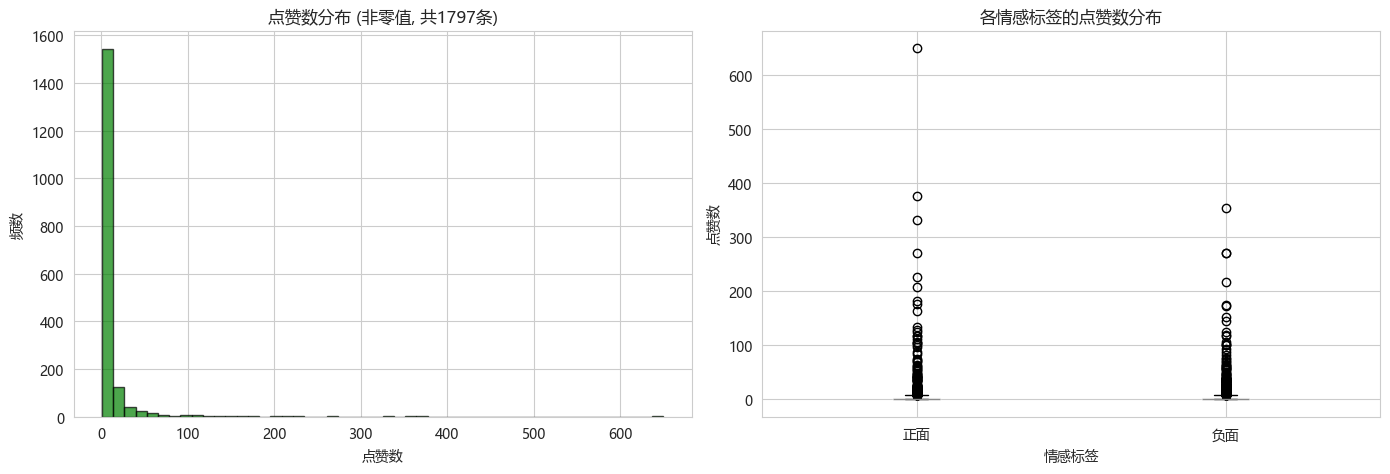

In [27]:
# 点赞数统计
print("点赞数统计:")
print(df['likes'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 点赞数分布（排除0值）
likes_nonzero = df[df['likes'] > 0]['likes']
if len(likes_nonzero) > 0:
    axes[0].hist(likes_nonzero, bins=50, edgecolor='black', alpha=0.7, color='green')
    axes[0].set_title(f'点赞数分布 (非零值, 共{len(likes_nonzero)}条)')
else:
    axes[0].text(0.5, 0.5, '无非零点赞数据', ha='center', va='center')
    axes[0].set_title('点赞数分布')
axes[0].set_xlabel('点赞数')
axes[0].set_ylabel('频数')

# 不同情感标签的点赞数分布
df.boxplot(column='likes', by='sentiment', ax=axes[1])
axes[1].set_title('各情感标签的点赞数分布')
axes[1].set_xlabel('情感标签')
axes[1].set_ylabel('点赞数')
plt.suptitle('')

plt.tight_layout()
plt.show()

## 8. 综合统计摘要

In [28]:
# 生成统计摘要
summary = {
    "数据总量": len(df),
    "来源类型": df['source'].nunique(),
    "来源列表": df['source'].unique().tolist(),
    "情感标签类型": df['sentiment'].unique().tolist(),
    "时间范围": f"{df['datetime'].min().date()} 到 {df['datetime'].max().date()}",
    "天数跨度": (df['datetime'].max() - df['datetime'].min()).days,
    "平均情感分数": round(df['sentiment_score'].mean(), 3),
    "平均点赞数": round(df['likes'].mean(), 2),
    "总点赞数": int(df['likes'].sum()),
}

print("\n" + "="*40)
print("数据统计摘要")
print("="*40)
for key, value in summary.items():
    print(f"{key}:", value)

print("\n情感标签分布:")
for sentiment, count in df['sentiment'].value_counts().items():
    pct = count / len(df) * 100
    print(f"  {sentiment}: {count} 条 ({pct:.1f}%)")


数据统计摘要
数据总量: 3009
来源类型: 1
来源列表: ['zhihu_circle']
情感标签类型: ['正面', '负面']
时间范围: 2025-03-21 到 2026-02-17
天数跨度: 332
平均情感分数: 0.395
平均点赞数: 5.92
总点赞数: 17821

情感标签分布:
  负面: 1819 条 (60.5%)
  正面: 1190 条 (39.5%)
